In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv


# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [3]:
data = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.shape

(10000, 14)

In [7]:
data.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# Dealing with missing value

In [9]:
data.isnull().values.any()

False

**Here no null values are present**

In [10]:
data=data.drop(columns=['RowNumber','CustomerId','Surname'])

# Dealing categorical values

In [11]:
data.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [12]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Using One hot encoding**

In [14]:
data=pd.get_dummies(data=data, drop_first=True)

In [15]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
data.select_dtypes(include='object').columns

Index([], dtype='object')

# Data visualization 

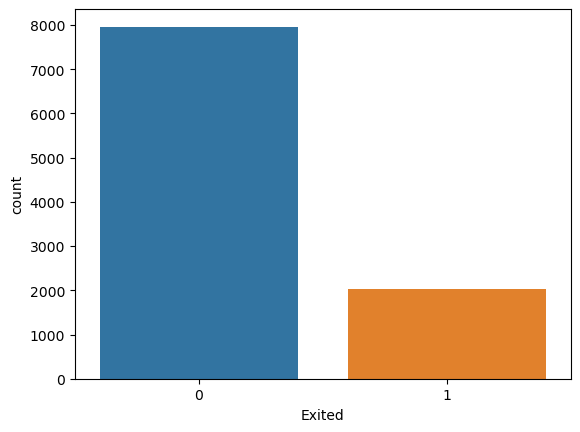

In [17]:
sns.countplot(x='Exited', data=data)
plt.show()

In [18]:
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


In [19]:
data2 = data.drop('Exited', axis=1)

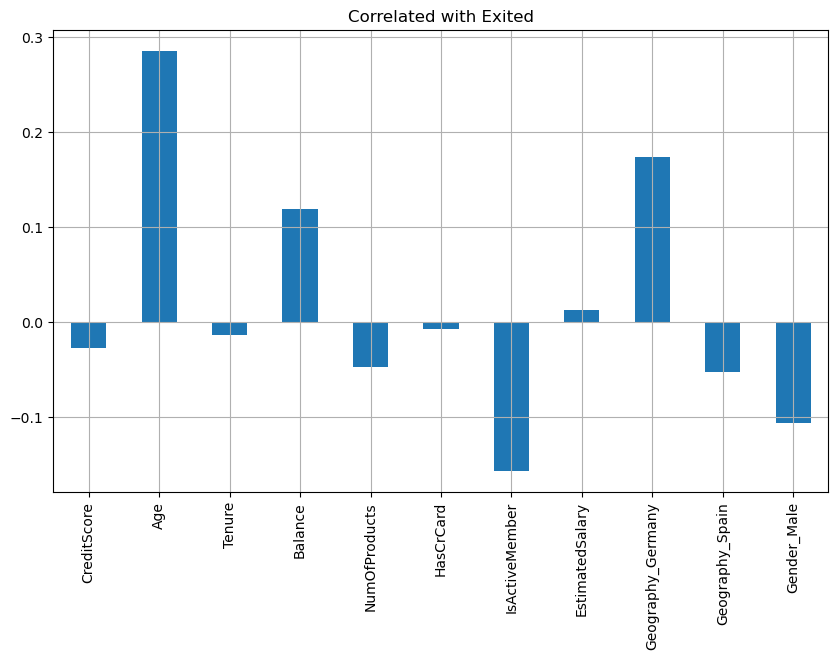

In [20]:
data2.corrwith(data['Exited']).plot.bar(figsize=(10,6), grid=True, title='Correlated with Exited')
plt.show()

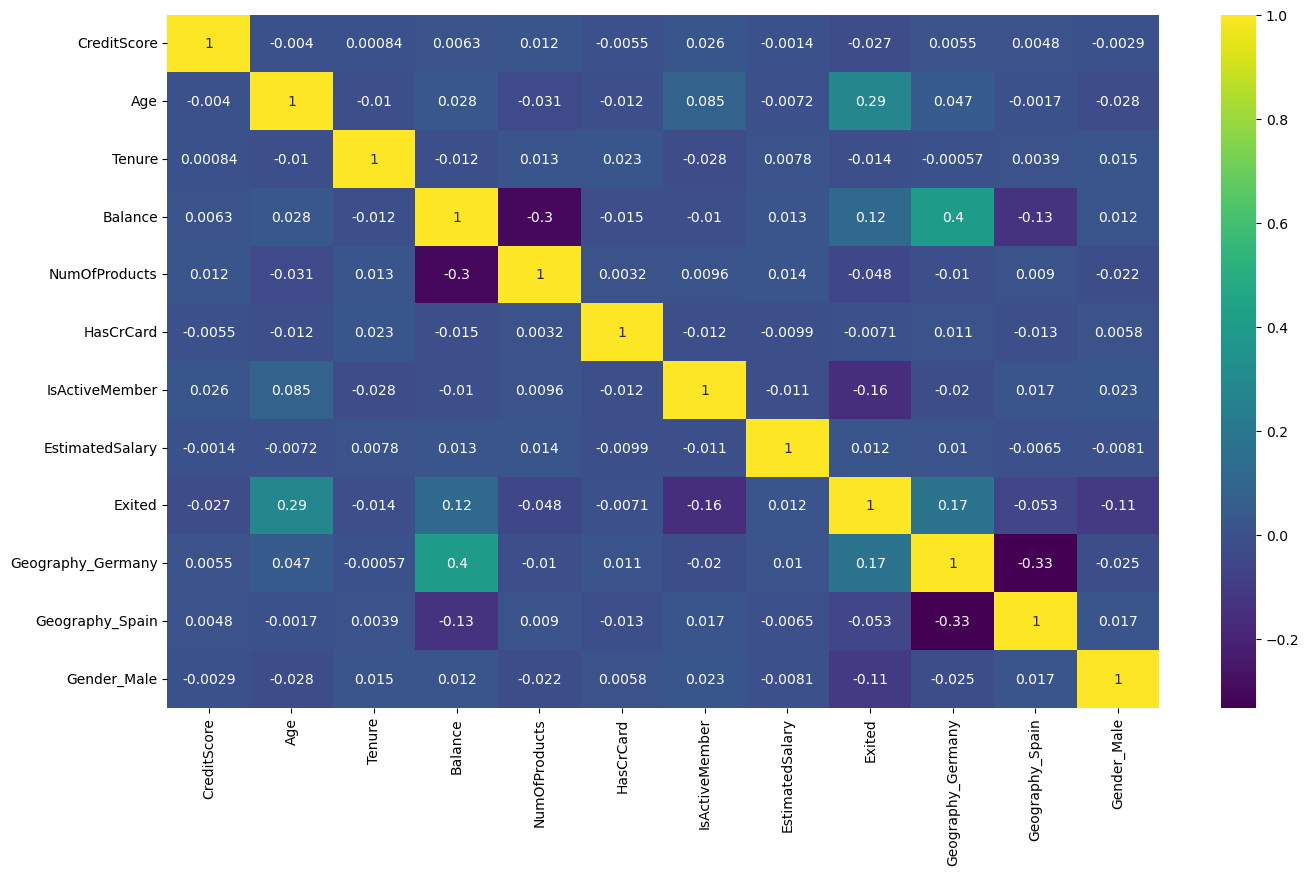

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), cmap='viridis', annot=True)
plt.show()

# Separating the dataset

In [22]:
x = data.drop('Exited', axis=1).values

In [23]:
y = data['Exited'].values

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x_train.shape

(8000, 11)

In [27]:
x_test.shape

(2000, 11)

In [28]:
scaler = StandardScaler()

In [29]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
classifier_lr = LogisticRegression()

In [32]:
classifier_lr.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred_lr  = classifier_lr.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
print('Logistic Regression')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred_lr))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred_lr))
print('\nClassification Report:\n',classification_report(y_test, y_pred_lr))

Logistic Regression

Accuracy Score: 0.811

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [36]:
classifier_rf = RandomForestClassifier()

In [37]:
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_pred_rf = classifier_rf.predict(x_test)

In [39]:
print('Random Forest Classifier')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred_rf))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred_rf))
print('\nClassification Report:\n',classification_report(y_test, y_pred_rf))

Random Forest Classifier

Accuracy Score: 0.868

Confusion Matrix:
 [[1547   60]
 [ 204  189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [40]:
classifier_xgb = XGBClassifier()

In [41]:
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
y_pred_xgb = classifier_xgb.predict(x_test)

In [43]:
print('XGBoost  Classifier')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred_xgb))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred_xgb))
print('\nClassification Report:\n',classification_report(y_test, y_pred_rf))

XGBoost  Classifier

Accuracy Score: 0.858

Confusion Matrix:
 [[1522   85]
 [ 199  194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



**Here we got the best accuracy using RandomForest Classifier**

# HyperParameter Tuning(RandomForest Classifier)

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
parameters = {
    'max_depth':[2, 3, 4, 5, None ],
    'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'criterion':["gini", "entropy", "log_loss"],
    'max_features':["sqrt", "log2", None],
    'bootstrap':[True, False],
    'class_weight':["balanced", "balanced_subsample"],
    'ccp_alpha': [0.0, 0.5, 1.0, 1.5, 2.0],
    
    
    
}

In [46]:
parameters

{'max_depth': [2, 3, 4, 5, None],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'class_weight': ['balanced', 'balanced_subsample'],
 'ccp_alpha': [0.0, 0.5, 1.0, 1.5, 2.0]}

In [47]:
randomized_serch = RandomizedSearchCV(estimator=classifier_rf,
                                      param_distributions=parameters,
                                      n_iter=10,
                                      n_jobs=-1,
                                     scoring='roc_auc',
                                     cv=5,
                                     verbose=2)

In [48]:
randomized_serch.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0, 0.5, 1.0, 1.5, 2.0],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   scoring='roc_auc', verbose=2)

In [49]:
randomized_serch.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=5, max_features=None, n_estimators=90)

In [50]:
randomized_serch.best_params_

{'n_estimators': 90,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'log_loss',
 'class_weight': 'balanced',
 'ccp_alpha': 0.0,
 'bootstrap': True}

In [51]:
randomized_serch.best_score_

0.8540384475472083

In [52]:
classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_features='log2', n_estimators=70)

In [53]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_features='log2', n_estimators=70)

In [54]:
y_pred = classifier.predict(x_test)

In [55]:
print('Random Forest Classifier')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n',classification_report(y_test, y_pred))

Random Forest Classifier

Accuracy Score: 0.8665

Confusion Matrix:
 [[1544   63]
 [ 204  189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

